# Loading and preparing Dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [4]:
data = pd.read_csv("datasets/apple_2014-2024_fullSimpleFeatures.csv")
data = data.sort_values(by=['date']).reset_index()
data = data.dropna().reset_index()

df = data[['date', 'Close']]
df['date'] = pd.to_datetime(df['date'])
df = df.rename(columns={'date': 'ds', 'Close': 'y'})

date_range = pd.date_range(start=df['ds'].min(), end=df['ds'].max())
df = df.set_index('ds').reindex(date_range).rename_axis('ds').reset_index()
df['y'] = df['y'].fillna(method='ffill')

df

C:\Users\user\AppData\Local\Temp\ipykernel_17880\963208510.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


,ds,y
0,2014-10-01,24.795000
1,2014-10-02,24.975000
2,2014-10-03,24.905001
3,2014-10-04,24.905001
4,2014-10-05,24.905001
...,...,...
3742,2024-12-29,255.589996
3743,2024-12-30,252.199997
3744,2024-12-31,250.419998
3745,2025-01-01,250.419998


# Creating the model

In [5]:
model = Prophet()
model.fit(df)

12:17:32 - cmdstanpy - INFO - Chain [1] start processing
12:17:35 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
# Forecasting

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

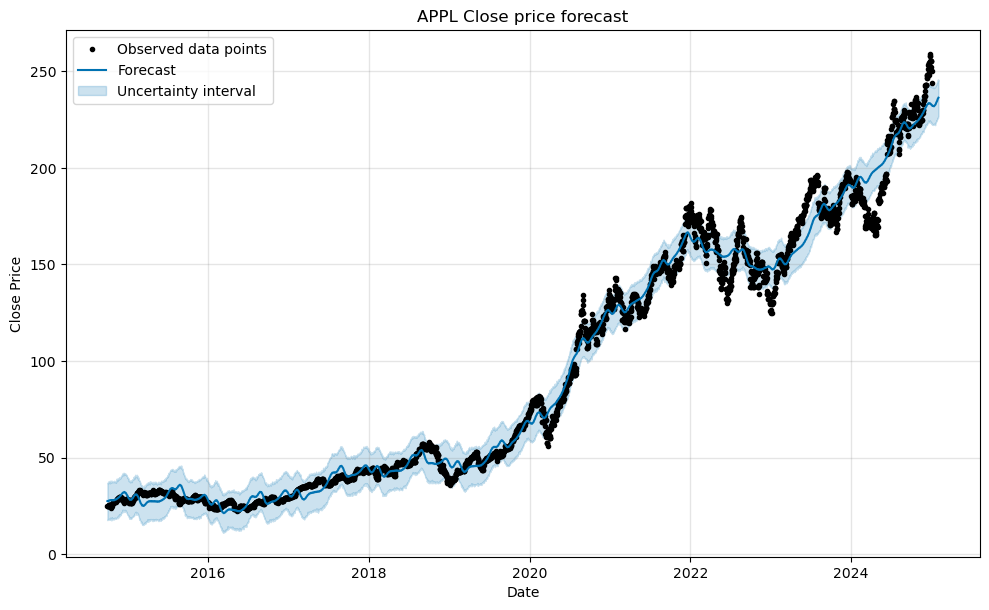

In [9]:
fig1 = model.plot(forecast)
plt.title('APPL Close price forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

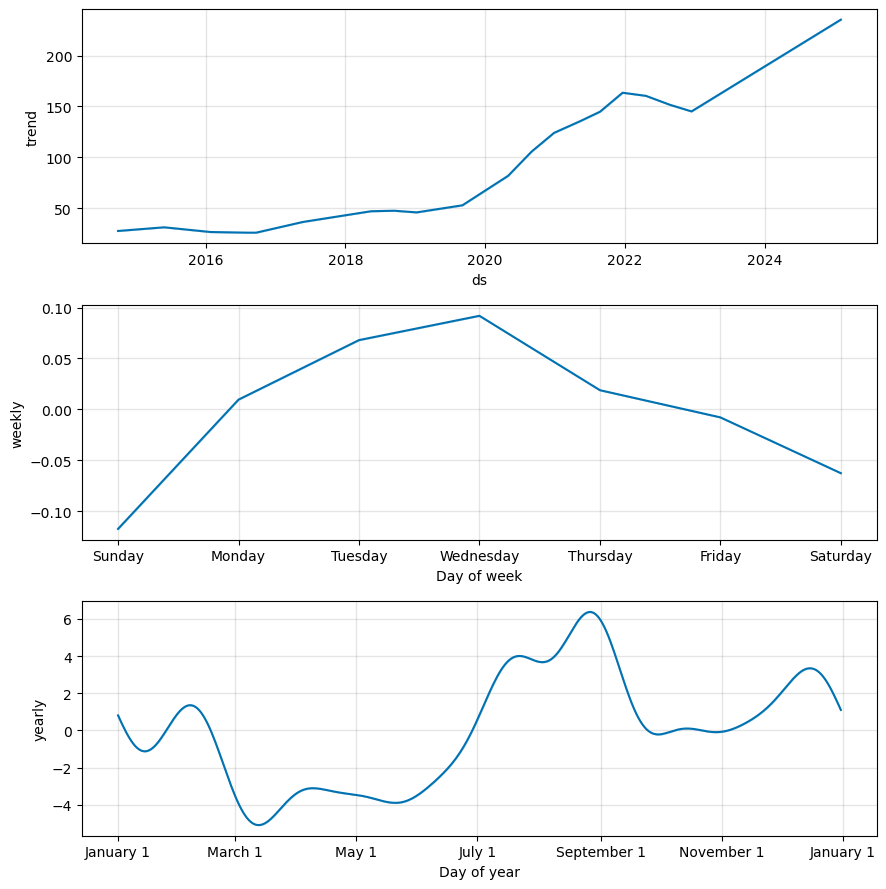

In [10]:
fig2 = model.plot_components(forecast)
plt.show()

## Model evaluation

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [30]:
train_size = 0.95
cutoff_date = df['ds'].iloc[int(len(df)*train_size)]
df_train = df[df['ds'] <= cutoff_date]
df_test = df[df['ds'] > cutoff_date]
 

In [31]:
from prophet import Prophet

model2 = Prophet()
model2.fit(df_train)

14:05:30 - cmdstanpy - INFO - Chain [1] start processing
14:05:32 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
future = model2.make_future_dataframe(periods=len(df_test), freq='D')
forecast = model2.predict(future)

forecast_filtered = forecast[['ds', 'yhat']].merge(df_test[['ds', 'y']], on='ds')

In [29]:
mae = mean_absolute_error(forecast_filtered['y'], forecast_filtered['yhat'])
rmse = mean_squared_error(forecast_filtered['y'], forecast_filtered['yhat'], squared=False)
r2 = r2_score(forecast_filtered['y'], forecast_filtered['yhat'])
mape = np.mean(np.abs((forecast_filtered['y'] - forecast_filtered['yhat']) / forecast_filtered['y'])) * 100

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R² score: {r2:.2f}')
print(f'MAPE: {mape:.2f}%')

MAE: 26.31
RMSE: 31.77
R² score: -0.57
MAPE: 11.87%


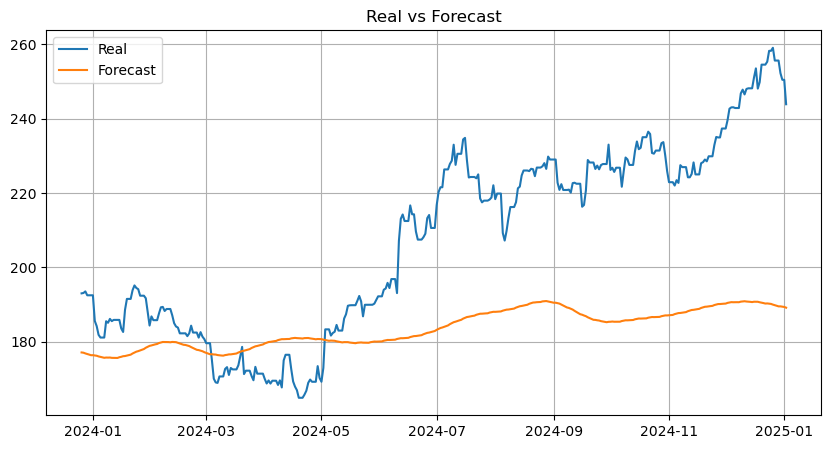

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(forecast_filtered['ds'], forecast_filtered['y'], label='Real')
plt.plot(forecast_filtered['ds'], forecast_filtered['yhat'], label='Forecast')
plt.legend()
plt.grid(True)
plt.title('Real vs Forecast')
plt.show()